In [5]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

# Load generated graphs

In [6]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph_unique_dict():
    path = "../unique_dictionary/ETNgen-InVS13_uniqueDict.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

def load_ETNgen_graph():
    path = "../Generated_graphs/ETNgen-InVS13.dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

In [7]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# Compute and store topological results

In [8]:

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


In [9]:
graphs_etn_ud = load_ETNgen_graph_unique_dict()
graphs_etn = load_ETNgen_graph()

In [10]:
orig_graph = load_origin_graph("InVS13")

In [14]:
def comp_metric(metric,o,graphs,graphs_ud,norm=True):
    orig = metric(o)
    
    etn_res_ud = metric(graphs_ud)
    etn_res = metric(graphs)
    
    if norm:
            
        etn_res = list(np.array(etn_res)/max(etn_res))
        etn_res_ud = list(np.array(etn_res_ud)/max(etn_res_ud))

    return orig,etn_res,etn_res_ud

In [17]:
res_etn = compute_all_metrics(orig_graph,graphs_etn)

density 	 0.051 0.000380
global clu	 0.030 0.105352
avg short p	 0.021 0.977048
metric p 	 0.052 0.000306
metric n 	 0.121 0.000002
assortat 	 0.252 0.000000
s metric	 0.041 0.007339
metric f 	 0.051 0.000380
strenght 	 0.220 0.000000
duration 	 0.100 0.000085


In [18]:
res_etn_ud = compute_all_metrics(orig_graph,graphs_etn_ud)

density 	 0.194 0.000000
global clu	 0.032 0.072616
avg short p	 0.239 0.000000
metric p 	 0.209 0.000000
metric n 	 0.503 0.000000
assortat 	 0.740 0.000000
s metric	 0.194 0.000000
metric f 	 0.194 0.000000
strenght 	 0.324 0.000000
duration 	 0.211 0.000000


In [19]:
np.save("../unique_dictionary/topology_res/InVS13-ud.npy",res_etn_ud)
np.save("../unique_dictionary/topology_res/InVS13.npy",res_etn)

# load topology results

In [11]:
labels = ["density","global clu","avg short","metric p","metric n","assortat","s metric","metric f","strenght","duration "]
def load_topo_res(ks):
    
    res = dict()
    #for k in :
    for k in ks:
        tmp = np.load("../variation_of_K_res/topology_res/InVS13-"+str(k)+".npy")
        res[k]=tmp
        
    return res

In [12]:
line_width = 1.5


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


In [13]:
labels = ["Density",
          "Global clustering \ncoefficient",
          "Average shortest\npath length",
          "Interacting\nindividuals",
          "New conversations",
          "Assortativity",
          "S-metric",        
          "Frequency of interactions",
          "Edge strength",
          "Duration of contacts"]

labels = labels

In [14]:
res_ud = np.load("../unique_dictionary/topology_res/InVS13-ud.npy")[:,0]
res = np.load("../unique_dictionary/topology_res/InVS13.npy")[:,0]

In [15]:
def flip_data(X,idx = [2, 5, 1, 8, 9, 6, 4, 3, 0, 7]):
    return X[idx]


idx =[2, 5, 1, 8, 9, 6, 4, 3, 0, 7]
tmp= ["Density",
      "Global clustering \ncoefficient",
      "Average shortest\npath length",
      "Interacting\nindividuals",
      "New conversations",
      "Assortativity",
      "S-metric",        
      "Number of interactions",
      "Edge strength",
      "Duration of contacts"]


tmp = np.array(tmp)
labels = np.flip(tmp[idx])
res_ud = np.flip(flip_data(res_ud))
res = np.flip(flip_data(res))

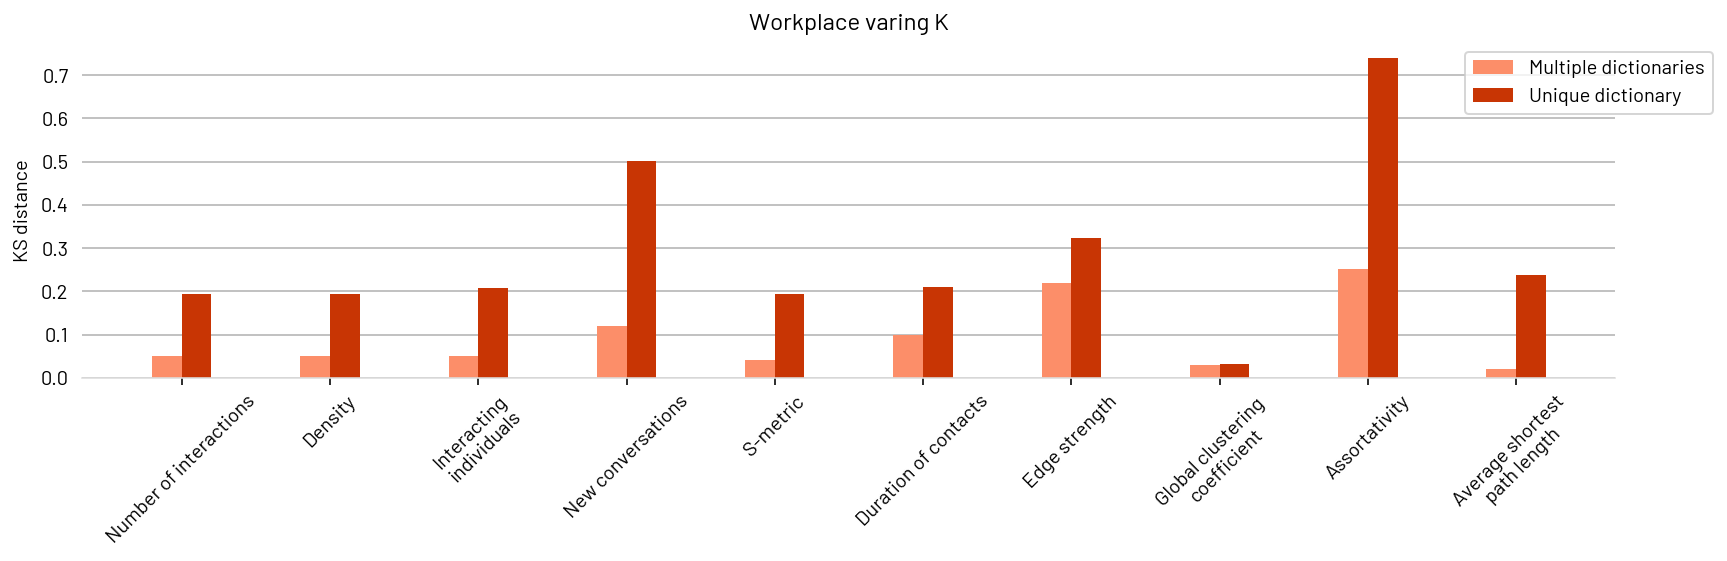

In [16]:
x = np.arange(len(res_ud))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(1,1,figsize=(12,4))


ax.title.set_text("Workplace varing K")
rects1 = ax.bar(x - 0.1, res, width,color="#fc8e69",label="Multiple dictionaries")
rects2 = ax.bar(x + 0.1, res_ud, width,color="#c83504",label="Unique dictionary")

ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
#ax.set_ylim(0,1)
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(bottom=False, right=False,left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.legend(loc='upper right',ncol = 1,bbox_to_anchor=(1.07, 1))

ax.tick_params(bottom=True, right=False,left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#b3b3b3')
ax.xaxis.grid(False)
ax.set_ylabel("KS distance")
fig.tight_layout()
plt.savefig("../unique_dictionary/topology_unique_dict.pdf", bbox_inches = 'tight')
plt.show()